**Adeyemo Sunday Abdullahi - OlabisiDS Notebook**

**About Dataset**
  
  **Content**

This dataset provides a comprehensive array of features relevant to heart health and lifestyle choices, encompassing patient-specific details such as age, gender, cholesterol levels, blood pressure, heart rate, and indicators like diabetes, family history, smoking habits, obesity, and alcohol consumption. Additionally, lifestyle factors like exercise hours, dietary habits, stress levels, and sedentary hours are included. Medical aspects comprising previous heart problems, medication usage, and triglyceride levels are considered. Socioeconomic aspects such as income and geographical attributes like country, continent, and hemisphere are incorporated. The dataset, consisting of 8763 records from patients around the globe, culminates in a crucial binary classification feature denoting the presence or absence of a heart attack risk, providing a comprehensive resource for predictive analysis and research in cardiovascular health.

**Dataset Glossary (Column-wise)**

*   Patient ID - Unique identifier for each patient

*   Age - Age of the patient

*   Sex - Gender of the patient (Male/Female)

*   Cholesterol - Cholesterol levels of the patient

*   Blood Pressure - Blood pressure of the patient (systolic/diastolic)

*   Heart Rate - Heart rate of the patient

*   Diabetes - Whether the patient has diabetes (Yes/No)

*   Family History - Family history of heart-related problems (1: Yes, 0: No)

*   Smoking - Smoking status of the patient (1: Smoker, 0: Non-smoker)

*   Obesity - Obesity status of the patient (1: Obese, 0: Not obese)

*   Alcohol Consumption - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)

*   Exercise Hours Per Week - Number of exercise hours per week

*   Diet - Dietary habits of the patient (Healthy/Average/Unhealthy)

*   Previous Heart Problems - Previous heart problems of the patient (1: Yes, 0: No)

*   Medication Use - Medication usage by the patient (1: Yes, 0: No)

*   Stress Level - Stress level reported by the patient (1-10)

*   Sedentary Hours Per Day - Hours of sedentary activity per day

*   Income - Income level of the patient

*   BMI - Body Mass Index (BMI) of the patient

*   Triglycerides - Triglyceride levels of the patient
*   Physical Activity Days Per Week - Days of physical activity per week

*   Sleep Hours Per Day - Hours of sleep per day

*   Country - Country of the patient

*   Continent - Continent where the patient resides

*   Hemisphere - Hemisphere where the patient resides

*   Heart Attack Risk - Presence of heart attack risk (1: Yes, 0: No)

**Notebook Objective**

The objective of this notebook is to predict the risk of heartattack in patients

**Importing Dataset Exploration Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [2]:
df = pd.read_csv("/content/heart_attack_prediction_dataset.csv")
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [4]:
#Dropping Patient ID column as its irrelevant
df.drop(columns = "Patient ID", axis=1, inplace=True)
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk'],
      dtype='object')

In [5]:
#Checking for duplicatee
df.duplicated().sum()

0

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


<Axes: >

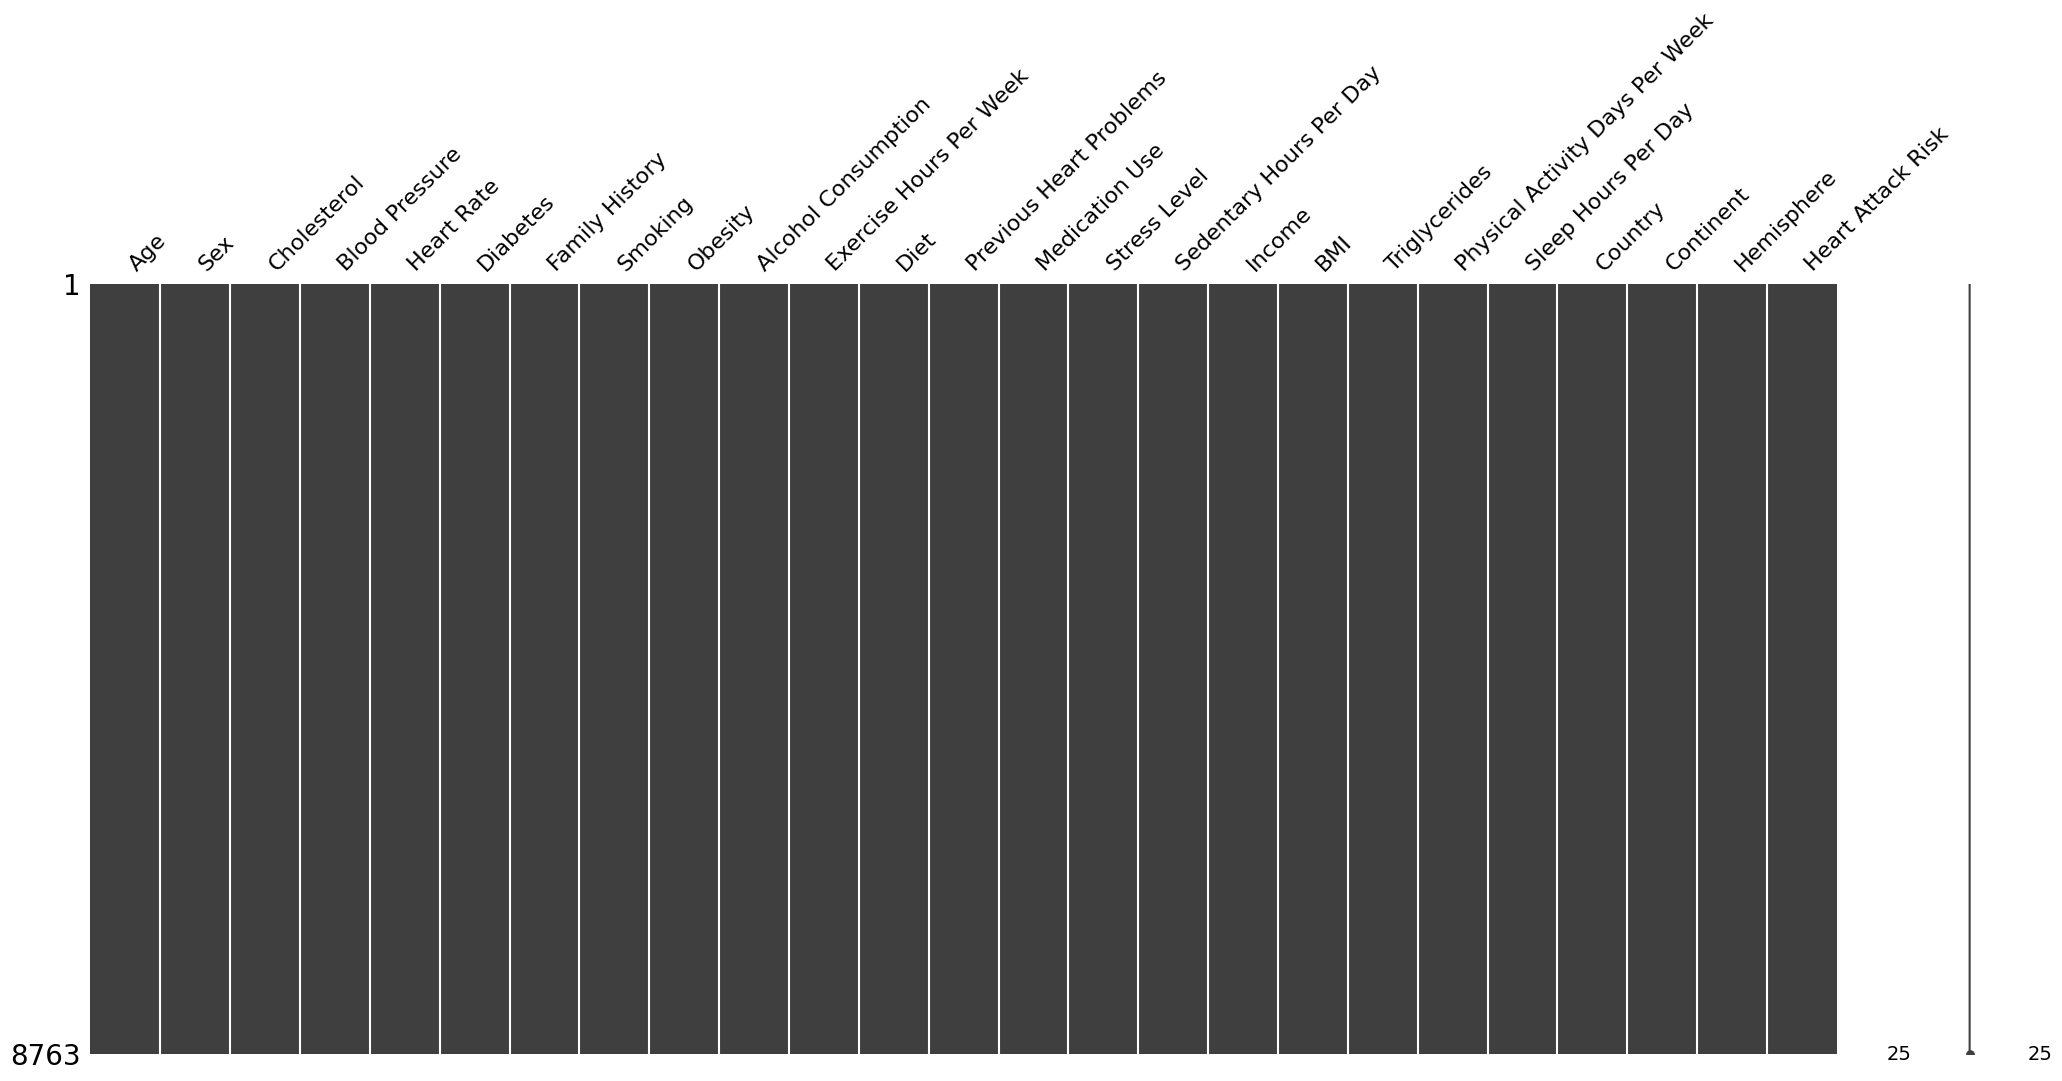

In [6]:
#Checking for missing values
print(df.isna().sum())
msn.matrix(df)

In [7]:
#Checking Column Summary
def column_summary(data):
  col = []
  dtype = []
  unique = []
  nunique = []
  duplicated = []
  null = []

  for column in data.columns:
    col.append(column)
    dtype.append(data[column].dtype)
    unique.append(data[column].unique())
    nunique.append(data[column].nunique())
    duplicated.append(data[column].duplicated().sum())
    null.append(data[column].isna().sum())

  return pd.DataFrame({"column" : col, "Dtype" : dtype, "Unique" : unique,
                       "No of Unique" : nunique, "Duplicated" : duplicated, "Null" : null})

column_summary(df)

,column,Dtype,Unique,No of Unique,Duplicated,Null
0,Age,int64,"[67, 21, 84, 66, 54, 90, 20, 43, 73, 71, 77, 6...",73,8690,0
1,Sex,object,"[Male, Female]",2,8761,0
2,Cholesterol,int64,"[208, 389, 324, 383, 318, 297, 358, 220, 145, ...",281,8482,0
3,Blood Pressure,object,"[158/88, 165/93, 174/99, 163/100, 91/88, 172/8...",3915,4848,0
4,Heart Rate,int64,"[72, 98, 73, 93, 48, 84, 107, 68, 55, 97, 70, ...",71,8692,0
5,Diabetes,int64,"[0, 1]",2,8761,0
6,Family History,int64,"[0, 1]",2,8761,0
7,Smoking,int64,"[1, 0]",2,8761,0
8,Obesity,int64,"[0, 1]",2,8761,0
9,Alcohol Consumption,int64,"[0, 1]",2,8761,0


In [8]:
#Sub_setting numerical columns
num_col = []
for column in df.columns:
  if df[column].dtype in ["int64", "float64"]:
    num_col.append(column)

#Column summary of num cols
column_summary(df[num_col])

,column,Dtype,Unique,No of Unique,Duplicated,Null
0,Age,int64,"[67, 21, 84, 66, 54, 90, 20, 43, 73, 71, 77, 6...",73,8690,0
1,Cholesterol,int64,"[208, 389, 324, 383, 318, 297, 358, 220, 145, ...",281,8482,0
2,Heart Rate,int64,"[72, 98, 73, 93, 48, 84, 107, 68, 55, 97, 70, ...",71,8692,0
3,Diabetes,int64,"[0, 1]",2,8761,0
4,Family History,int64,"[0, 1]",2,8761,0
5,Smoking,int64,"[1, 0]",2,8761,0
6,Obesity,int64,"[0, 1]",2,8761,0
7,Alcohol Consumption,int64,"[0, 1]",2,8761,0
8,Exercise Hours Per Week,float64,"[4.168188835442079, 1.8132416178634456, 2.0783...",8763,0,0
9,Previous Heart Problems,int64,"[0, 1]",2,8761,0


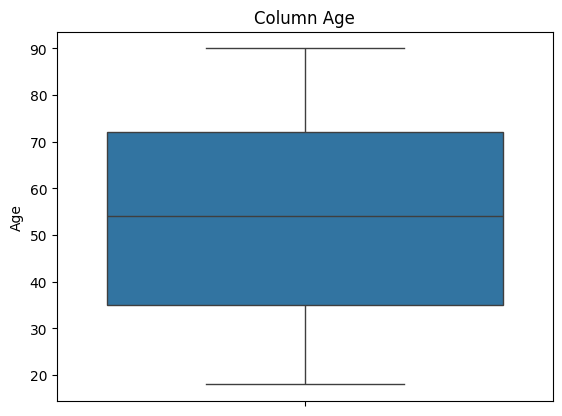

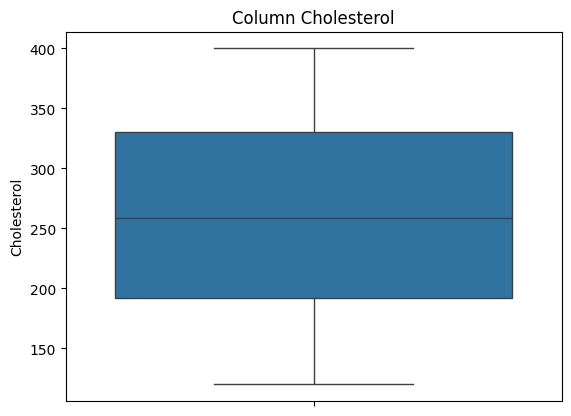

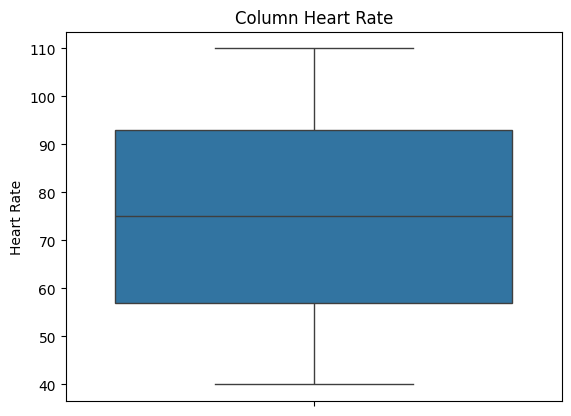

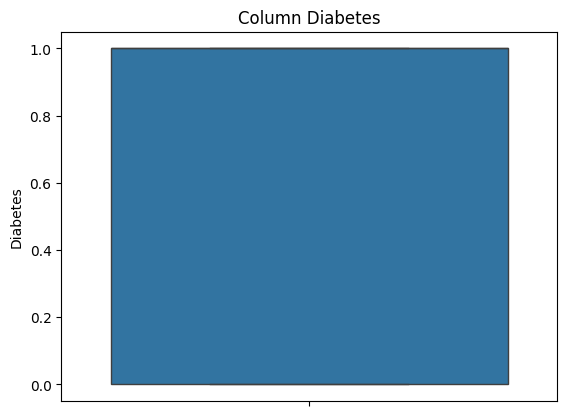

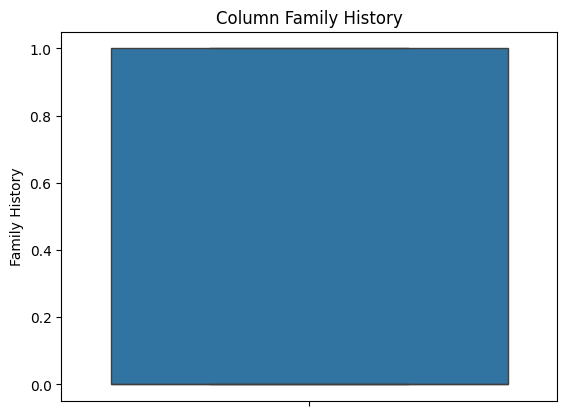

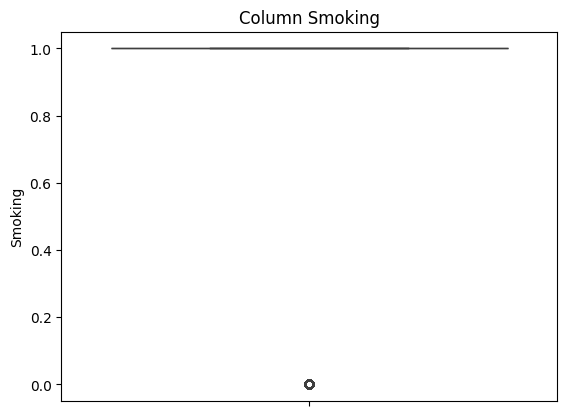

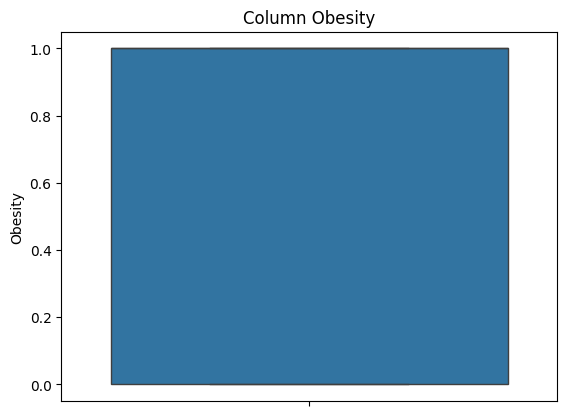

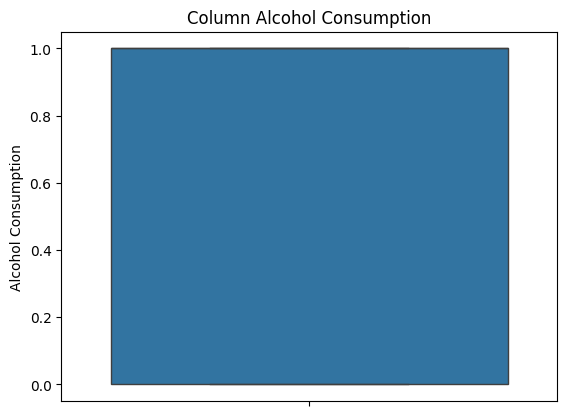

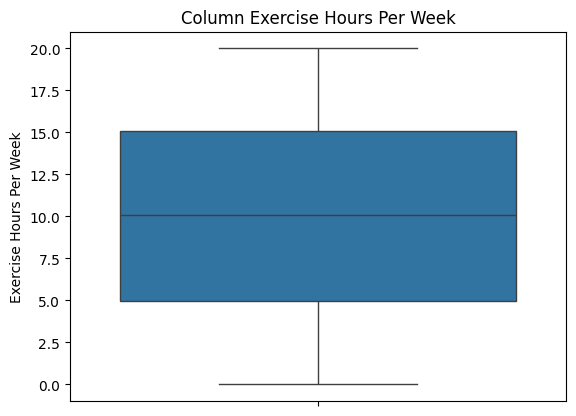

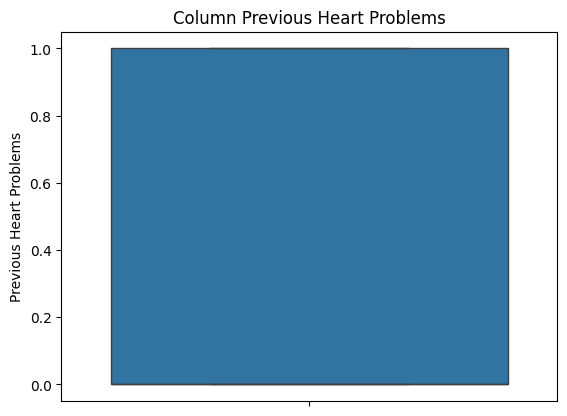

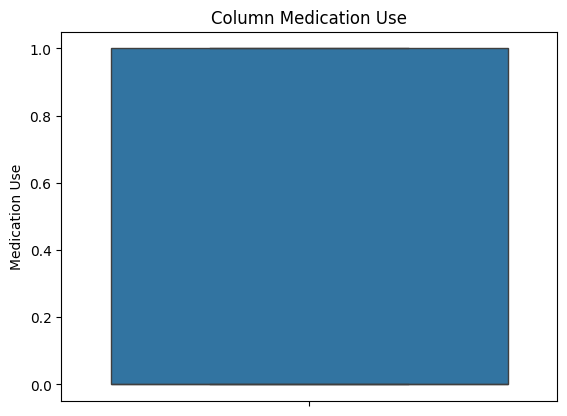

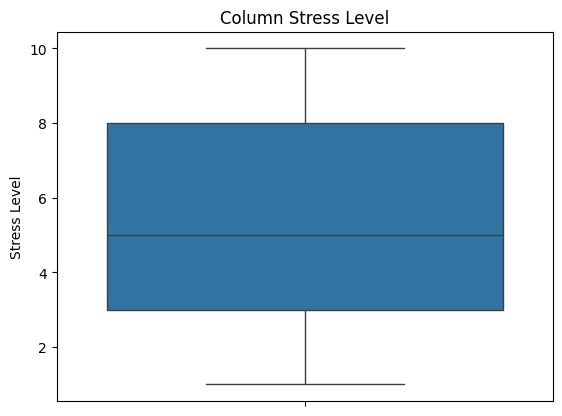

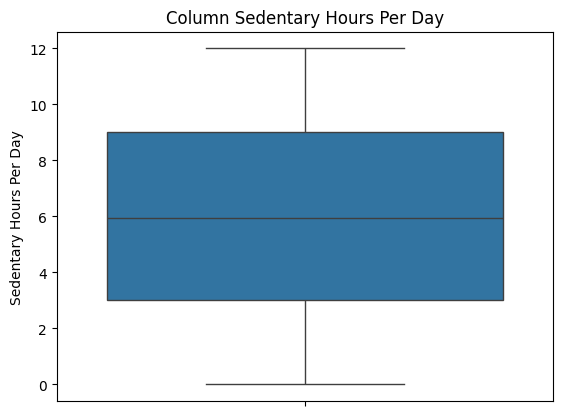

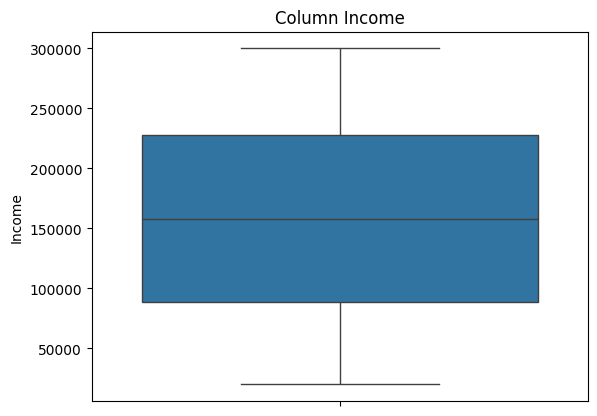

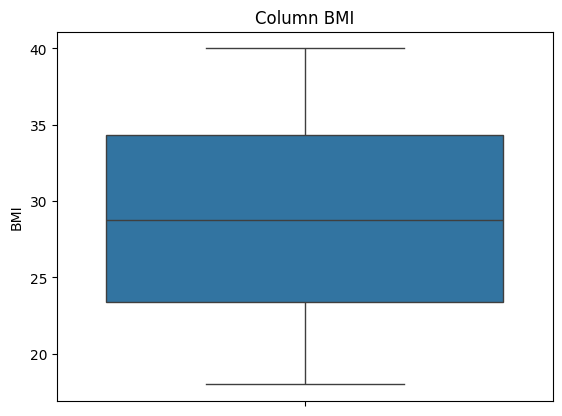

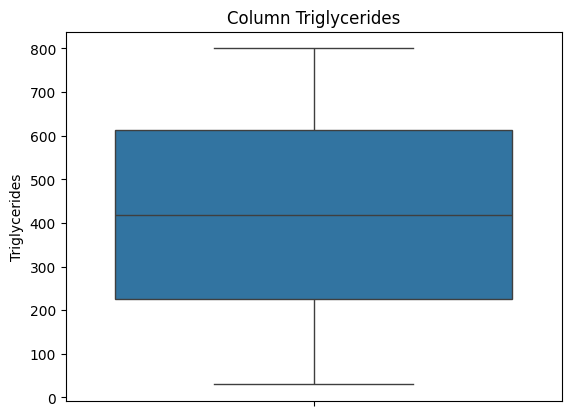

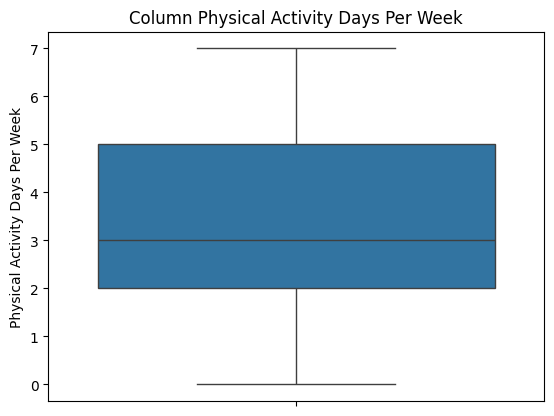

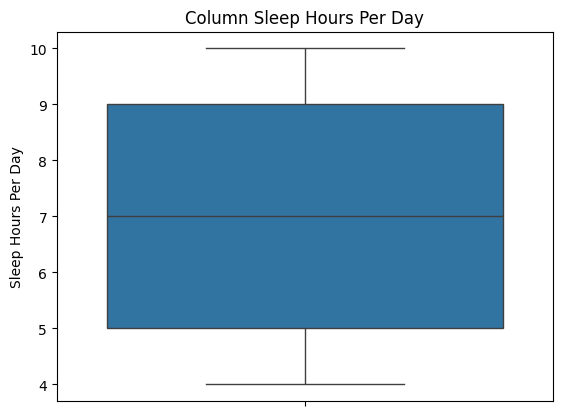

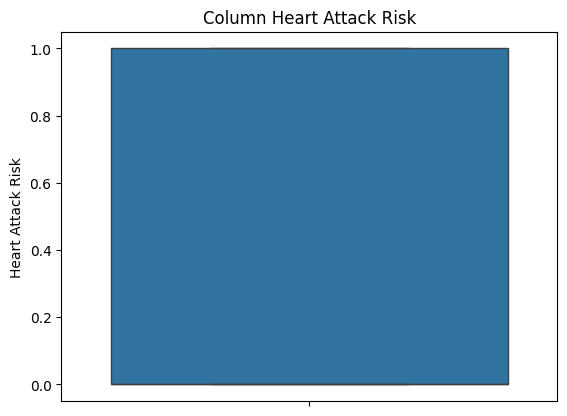

In [9]:
#Checking for outliers in numerical columns by visualization
def visualize_outliers(data):
  for i in num_col:
    sns.boxplot(data[i])
    plt.title(f"Column {i}")
    plt.show();

visualize_outliers(data=df)

*   There is no problem of outliers in dataset

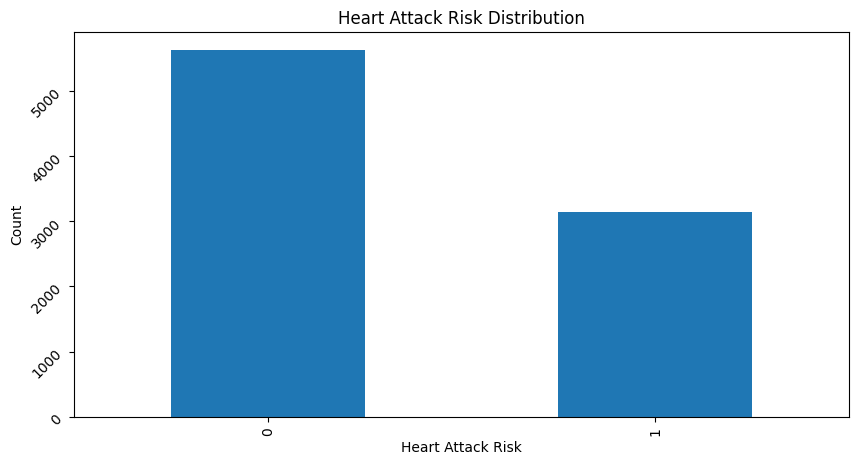

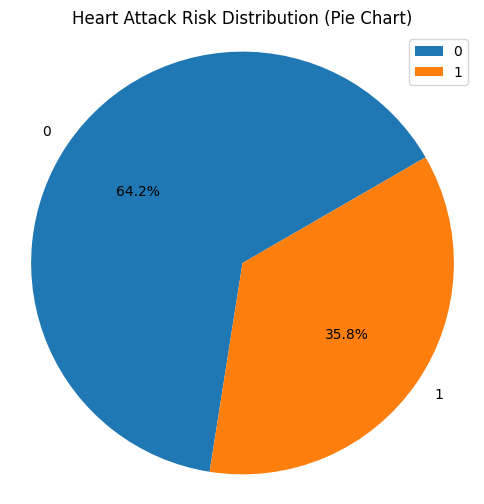

In [10]:
#Checking for the balance of the target by visualization
plt.figure(figsize=(10, 5))
df["Heart Attack Risk"].value_counts().plot(kind="bar")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Count")
plt.title("Heart Attack Risk Distribution")
plt.yticks(rotation = 45)
plt.show();

#Pie chart visualization
plt.figure(figsize=(6, 6))
plt.pie(df["Heart Attack Risk"].value_counts(),
        labels=df["Heart Attack Risk"].value_counts().index,
        autopct="%1.1f%%",
        startangle=30)
plt.axis("equal")
plt.legend(df["Heart Attack Risk"].value_counts().index, loc="best")
plt.title("Heart Attack Risk Distribution (Pie Chart)")
plt.show();

*   With this visualization, it occurs that the tatget is slightly imbalanced with 64.2% of cases being negative and 35.8% being positive. We will have to oversample the target later on in the notebook

Categorizing patients age into different sections

In [11]:
#Identifying the youngest and oldest patient age
youngest_age = df["Age"].min()
oldest_age = df["Age"].max()

print("Youngest age:", youngest_age)
print("Oldest age:", oldest_age)

Youngest age: 18
Oldest age: 90


*   Checking categorical column

In [12]:
#Sub_setting categorical columns
cat_col = []
for column in df.columns:
  if df[column].dtype == "object":
    cat_col.append(column)

#Column summary of cat cols
column_summary(df[cat_col])

,column,Dtype,Unique,No of Unique,Duplicated,Null
0,Sex,object,"[Male, Female]",2,8761,0
1,Blood Pressure,object,"[158/88, 165/93, 174/99, 163/100, 91/88, 172/8...",3915,4848,0
2,Diet,object,"[Average, Unhealthy, Healthy]",3,8760,0
3,Country,object,"[Argentina, Canada, France, Thailand, Germany,...",20,8743,0
4,Continent,object,"[South America, North America, Europe, Asia, A...",6,8757,0
5,Hemisphere,object,"[Southern Hemisphere, Northern Hemisphere]",2,8761,0


*   In the categorical columns above, blood pressure which is systolic/diastolic came as categorical. we will split them and turn them to numerical columns

In [13]:
#Splitting
df[["Systolic", "Diastolic"]] = df["Blood Pressure"].str.split("/", expand=True)

#Converting to numerical
df["Systolic"] = pd.to_numeric(df["Systolic"])
df["Diastolic"] = pd.to_numeric(df["Diastolic"])

#Dropping Blood Pressure column
df.drop(columns = "Blood Pressure", axis=1, inplace=True)

print(df["Systolic"].head(2))
print(df["Diastolic"].head(2))

0    158
1    165
Name: Systolic, dtype: int64
0    88
1    93
Name: Diastolic, dtype: int64


*   Systolic and Diastolic columns are now in numerical format. Rechecking df categorial columns

In [14]:
cat_col = []
for column in df.columns:
  if df[column].dtype == "object":
    cat_col.append(column)

#Column summary of cat cols
column_summary(df[cat_col])

,column,Dtype,Unique,No of Unique,Duplicated,Null
0,Sex,object,"[Male, Female]",2,8761,0
1,Diet,object,"[Average, Unhealthy, Healthy]",3,8760,0
2,Country,object,"[Argentina, Canada, France, Thailand, Germany,...",20,8743,0
3,Continent,object,"[South America, North America, Europe, Asia, A...",6,8757,0
4,Hemisphere,object,"[Southern Hemisphere, Northern Hemisphere]",2,8761,0


*    Updating numerical columns with Systolic and Diastolic

In [15]:
num_col = []
for column in df.columns:
  if df[column].dtype in ["int64", "float64"]:
    num_col.append(column)

*   Checking correlation across columns

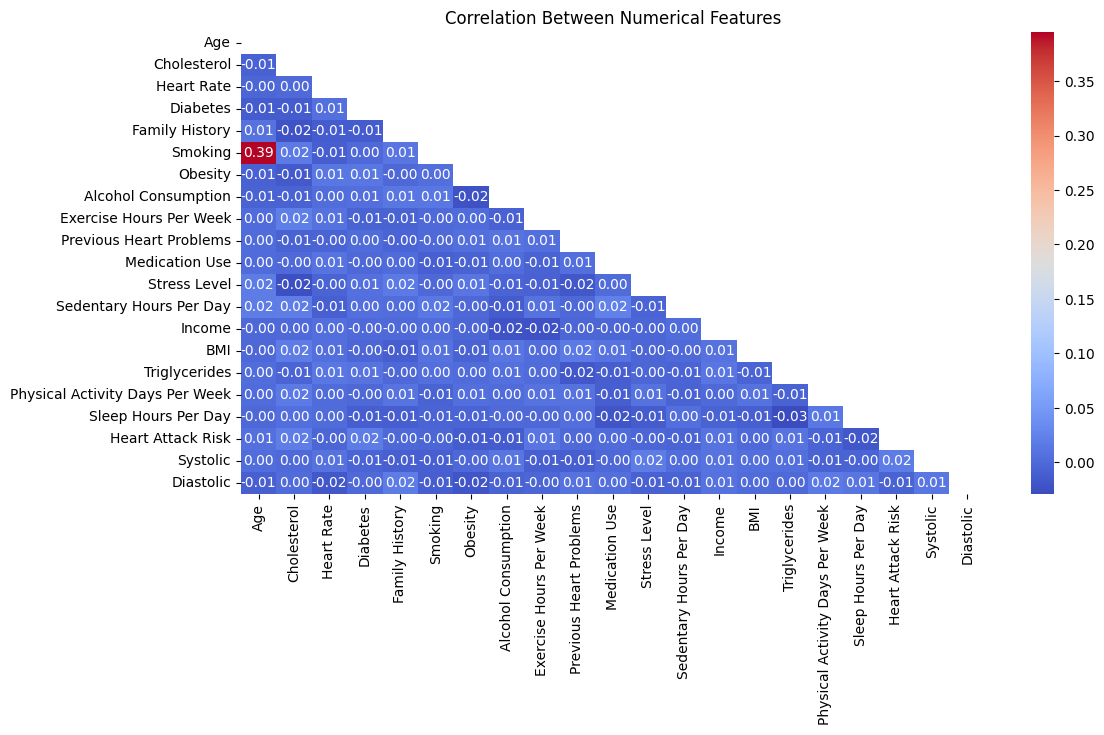

In [16]:
corr = df[num_col].corr()
mask = np.triu(corr)
plt.figure(figsize=(12,6))
sns.heatmap(corr,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            fmt='.2f')
plt.title("Correlation Between Numerical Features")
plt.show();

*   There's no correlation between Attributes

**Modelling**

*   Modelling Environment Set-Up

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report, roc_curve, auc

*   Splitting data into training and test sets

In [18]:
X = df.drop(columns="Heart Attack Risk", axis=1)
y = df["Heart Attack Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train_Shape", X_train.shape)
print("X_test_shape", X_test.shape)
print("y_train_shape", y_train.shape)
print("y_test_shape", y_test.shape)

X_train_Shape (7010, 25)
X_test_shape (1753, 25)
y_train_shape (7010,)
y_test_shape (1753,)


*   Encoding

In [19]:
X_train_cat_cols = []
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train_cat_cols.append(column)

column_summary(df[X_train_cat_cols])

,column,Dtype,Unique,No of Unique,Duplicated,Null
0,Sex,object,"[Male, Female]",2,8761,0
1,Diet,object,"[Average, Unhealthy, Healthy]",3,8760,0
2,Country,object,"[Argentina, Canada, France, Thailand, Germany,...",20,8743,0
3,Continent,object,"[South America, North America, Europe, Asia, A...",6,8757,0
4,Hemisphere,object,"[Southern Hemisphere, Northern Hemisphere]",2,8761,0


*   Encoding X_train categorical columns

In [20]:
#Encoding Sex Column
sex_encod_dict = {
    "Male": 0,
    "Female": 1
}

#Using the replace method to apply the mapping
X_train["Sex"] = X_train["Sex"].replace(sex_encod_dict)

#Encoding diet column and dropping original
encoded_diet = pd.get_dummies(X_train["Diet"], prefix="diet")
X_train = pd.concat([X_train, encoded_diet], axis=1)
X_train.drop("Diet", axis=1, inplace=True)

#Encoding Hemisphere column
hemisphere_encod_dict = {
    "Southern Hemisphere": 0,
    "Northern Hemisphere": 1
}

#Using the replace method to apply the mapping
X_train["Hemisphere"] = X_train["Hemisphere"].replace(hemisphere_encod_dict)

#Encoding Country column and dropping original
encoded_country = pd.get_dummies(X_train["Country"], prefix="country")
X_train = pd.concat([X_train, encoded_country], axis=1)
X_train.drop("Country", axis=1, inplace=True)

#Encoding continent column and dropping original
encoded_continent = pd.get_dummies(X_train["Continent"], prefix="continent")
X_train = pd.concat([X_train, encoded_continent], axis=1)
X_train.drop("Continent", axis=1, inplace=True)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 5967 to 7270
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              7010 non-null   int64  
 1   Sex                              7010 non-null   int64  
 2   Cholesterol                      7010 non-null   int64  
 3   Heart Rate                       7010 non-null   int64  
 4   Diabetes                         7010 non-null   int64  
 5   Family History                   7010 non-null   int64  
 6   Smoking                          7010 non-null   int64  
 7   Obesity                          7010 non-null   int64  
 8   Alcohol Consumption              7010 non-null   int64  
 9   Exercise Hours Per Week          7010 non-null   float64
 10  Previous Heart Problems          7010 non-null   int64  
 11  Medication Use                   7010 non-null   int64  
 12  Stress Level     

In [22]:
#Convert all columns to numeric
X_train = X_train.apply(pd.to_numeric, errors="coerce")

In [23]:
#oversampling of training set because of data imbalance in target vector
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [24]:
#Encoding Sex Column
sex_encod_dict = {
    "Male": 0,
    "Female": 1
}

#Using the replace method to apply the mapping
X_test["Sex"] = X_test["Sex"].replace(sex_encod_dict)

#Encoding diet column and dropping original
encoded_diet = pd.get_dummies(X_test["Diet"], prefix="diet")
X_test = pd.concat([X_test, encoded_diet], axis=1)
X_test.drop("Diet", axis=1, inplace=True)

#Encoding Hemisphere column
hemisphere_encod_dict = {
    "Southern Hemisphere": 0,
    "Northern Hemisphere": 1
}

#Using the replace method to apply the mapping
X_test["Hemisphere"] = X_test["Hemisphere"].replace(hemisphere_encod_dict)

#Encoding Country column and dropping the original
encoded_country = pd.get_dummies(X_test["Country"], prefix="country")
X_test = pd.concat([X_test, encoded_country], axis=1)
X_test.drop("Country", axis=1, inplace=True)

#Encoding continent column and dropping the original
encoded_continent = pd.get_dummies(X_test["Continent"], prefix="continent")
X_test = pd.concat([X_test, encoded_continent], axis=1)
X_test.drop("Continent", axis=1, inplace=True)

In [25]:
#Convert all columns to numeric
X_test = X_test.apply(pd.to_numeric, errors="coerce")

In [26]:
num_features_before_selection = X_train.shape[1]
print("Total number of features before feature selection:", num_features_before_selection)

Total number of features before feature selection: 51


In [29]:
#Performing feature selection using SelectKBest with ANOVA test
selector = SelectKBest(score_func=f_classif, k=25)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

#Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

#Get the names of the selected features
selected_features = X.columns[selected_feature_indices]
print("Selected Features:", selected_features.tolist())

Selected Features: ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Systolic', 'Diastolic']


In [30]:
#Scaling X_train
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [31]:
#Scaling X_test
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)

*   **Random Forest Classifier Model**

In [32]:
#Defining class weight to help in predicting class 1-the danger of heart attack
class_weights = {0: 0.358, 1: 0.642}

#Define parameter grid
rfc_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

#Initialize Random Forest Classifier
model_rfc = RandomForestClassifier(class_weight=class_weights, random_state=42)

#Initialize GridSearchCV
rfc_model = GridSearchCV(
    model_rfc,
    param_grid=rfc_param_grid,
    cv=5
)

#Fit the model to the training set
rfc_model.fit(X_train, y_train)

#Check the best parameters
rfc_best_params = rfc_model.best_params_
print("RFC Best Params:", rfc_best_params)

RFC Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [33]:
#Checking rfc_model accuracy on training set
rfc_acc = rfc_model.score(X_train, y_train)
print("RFR Training Accuracy:", rfc_acc.round(2))

RFR Training Accuracy: 0.96


In [34]:
#Prediction on test set
rfc_test_pred = rfc_model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, rfc_test_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.558471192241871


In [36]:
rfc_classification_report = classification_report(y_test, rfc_test_pred)
print(rfc_classification_report)

              precision    recall  f1-score   support

           0       0.64      0.69      0.67      1125
           1       0.37      0.32      0.34       628

    accuracy                           0.56      1753
   macro avg       0.51      0.50      0.50      1753
weighted avg       0.54      0.56      0.55      1753



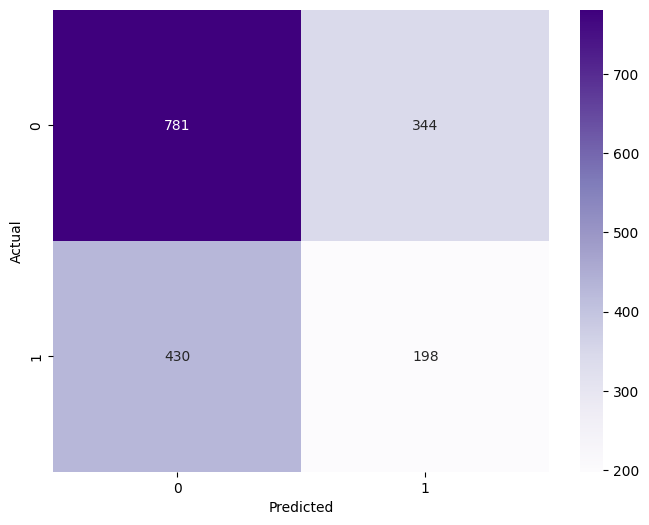

In [37]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, rfc_test_pred),
            annot=True,
            fmt='', cmap="Purples")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

#Define the parameters
n_estimators = [50, 100, 200]
learning_rate = [0.05, 0.1, 0.2]
max_depth = [3, 5, 7]

#Initialize the Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(random_state=42)

#Define parameter grid
gbc_param_grid = {
    "n_estimators": n_estimators,
    "learning_rate": learning_rate,
    "max_depth": max_depth
}

#Initialize GridSearchCV
gbc_model = GridSearchCV(
    model_gbc,
    param_grid=gbc_param_grid,
    cv=5
)

#Fit the model to the training set
gbc_model.fit(X_train, y_train)

#Check the best parameters
gbc_best_params = gbc_model.best_params_
print("Gradient Boosting Classifier Best Params:", gbc_best_params)

Gradient Boosting Classifier Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


In [41]:
#Checking gbc_model accuracy on training set
gbc_acc = gbc_model.score(X_train, y_train)
print("GBC Training Accuracy:", gbc_acc.round(2))

GBC Training Accuracy: 0.71


In [42]:
#Prediction on test set
gbc_test_pred = gbc_model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, gbc_test_pred)
print("GBC Test Accuracy:", accuracy)

GBC Test Accuracy: 0.6274957216200798


In [44]:
gbc_classification_report = classification_report(y_test, gbc_test_pred)
print(gbc_classification_report)

              precision    recall  f1-score   support

           0       0.64      0.95      0.77      1125
           1       0.34      0.04      0.07       628

    accuracy                           0.63      1753
   macro avg       0.49      0.50      0.42      1753
weighted avg       0.53      0.63      0.52      1753



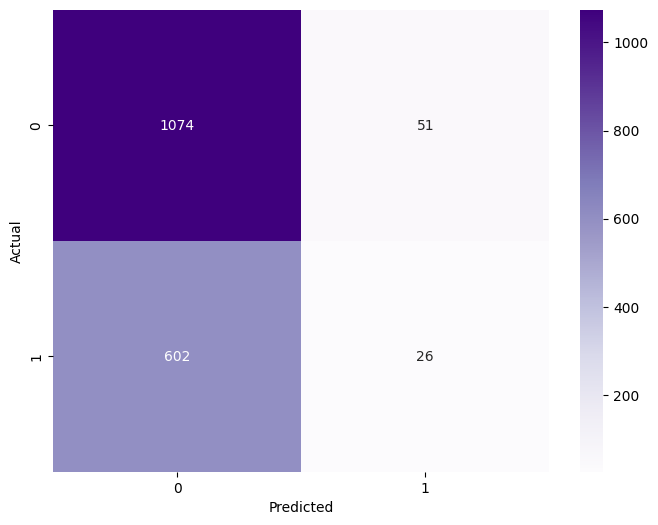

In [46]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, gbc_test_pred),
            annot=True,
            fmt='', cmap="Purples")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

**All The Best**